# Distribuzioni di v.c. discrete {#sec-discr-rv-distributions}

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from scipy.integrate import quad
import arviz as az
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
seed: int = sum(map(ord, "discr_rv_distr"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

La previsione è un processo che ci permette di formulare ipotesi su eventi incerti, sfruttando le regolarità osservate nei processi naturali, sociali e psicologici. Uno degli obiettivi principali della data science è proprio quello di prevedere fenomeni di cui non abbiamo ancora certezza, inclusi, ma non limitati a, eventi futuri.

La capacità di fare previsioni senza considerare ogni possibile risultato dipende dalla conoscenza della popolazione di riferimento. Gli esseri umani organizzano e rappresentano questa conoscenza in vari modi. In questo capitolo, esploreremo le implicazioni di un approccio specifico alla rappresentazione delle popolazioni: le distribuzioni di probabilità.

Supponiamo di avere una distribuzione di probabilità $p(x)$ associata a una variabile casuale $X$. Consideriamo che questa distribuzione rappresenti la variabilità osservata all'interno di una popolazione. Se selezionassimo un'istanza in modo uniforme e casuale dalla popolazione, quale valore della variabile $X$ dovremmo aspettarci? Ci aspettiamo che un campione estratto casualmente dalla popolazione segua la distribuzione $p(x)$. In altre parole, questa distribuzione è ciò che definiamo un modello statistico, o più semplicemente, un modello della popolazione. Il termine "modello" sottolinea che la distribuzione non è la popolazione stessa, ma una rappresentazione astratta che utilizziamo per fare previsioni.

In particolare, ci concentreremo sulle distribuzioni di probabilità discrete, essenziali per comprendere i fenomeni aleatori che presentano un numero finito o numerabile di esiti. Queste distribuzioni sono cruciali nella modellazione e nell'analisi di eventi che si verificano in contesti discreti, fornendo le basi per una comprensione più profonda delle dinamiche probabilistiche che governano tali fenomeni.

Ogni distribuzione di probabilità è caratterizzata da uno o più parametri, che consentono di controllare specifici aspetti della distribuzione stessa. Esploreremo diverse distribuzioni discrete, ciascuna con le sue caratteristiche e applicazioni:

1. Distribuzione di Bernoulli
   - Rappresenta esperimenti con due possibili esiti: "successo" o "insuccesso"
   - Costituisce il nucleo dei processi Bernoulliani
   - Parametro chiave: probabilità di successo in ciascuna prova

2. Distribuzione Binomiale
   - Descrive il numero totale di successi in un numero fisso di prove Bernoulliane
   - Nasce dalla somma di prove Bernoulliane indipendenti
   - Parametri: probabilità di successo in ciascuna prova e numero totale di prove

3. Distribuzione di Poisson
   - Modella eventi rari o che si verificano su intervalli di tempo o spazio variabili
   - Adatta quando il numero di prove è una variabile casuale
   - Parametro: tasso medio di successo per unità di tempo o spazio

4. Distribuzione Beta-Binomiale
   - Utilizzata quando la probabilità di successo in una serie di prove Bernoulliane non è costante
   - Offre una rappresentazione più flessibile rispetto alla distribuzione binomiale
   - Parametri: derivati dalla distribuzione Beta sottostante

5. Distribuzione Uniforme Discreta
   - Ogni evento all'interno di un determinato intervallo finito ha la stessa probabilità
   - Utile quando non ci sono motivi per privilegiare un risultato rispetto a un altro
   - Non dipende da parametri una volta stabilito il supporto della distribuzione

In sintesi, attraverso lo studio di queste distribuzioni, acquisiremo gli strumenti necessari per analizzare e prevedere una vasta gamma di situazioni reali. 

## Distribuzione di Bernoulli

In statistica, un esperimento che ammette solo due esiti possibili è modellato attraverso quella che viene chiamata "prova Bernoulliana". Un esempio tipico è il lancio di una moneta, che può dare come risultato testa o croce.

::: {#def-}
Una variabile casuale $X$ che assume valori in $\{0, 1\}$ è detta variabile di Bernoulli. La sua distribuzione di probabilità è definita come:

$$
P(X \mid \theta) =
  \begin{cases}
    p     & \text{se $X = 1$ (successo)}, \\
    1 - p & \text{se $X = 0$ (insuccesso)},
  \end{cases}
$$

dove $0 \leq p \leq 1$. Il parametro $p$ rappresenta la probabilità del "successo" ($X = 1$), mentre $1 - p$ è la probabilità dell'"insuccesso" ($X = 0$).
:::

La distribuzione di Bernoulli descrive quindi un contesto in cui la probabilità di osservare l'esito 1 è $p$ e quella di osservare l'esito 0 è $1 - p$. Viene utilizzata per modellare situazioni binarie, come una risposta "sì" o "no", oppure un "successo" o "insuccesso".

Calcolando il valore atteso e la varianza, otteniamo:

$$
\begin{align}
\mathbb{E}(X) &= 0 \cdot P(X=0) + 1 \cdot P(X=1) = p, \\
\mathbb{V}(X) &= (0 - p)^2 \cdot P(X=0) + (1 - p)^2 \cdot P(X=1) = p(1-p).
\end{align}
$$ {#eq-ev-var-bern}

Esplicitando ulteriormente la formula della varianza con $P(YX=0) = 1 - p$ e $P(X=1) = p$, abbiamo:

$$ \mathbb{V}(X) = (0 - p)^2 \cdot (1 - p) + (1 - p)^2 \cdot p $$

Calcoliamo ora le singole parti dell'espressione:
1. $(0 - p)^2 = p^2$
2. $(1 - p)^2 = 1 - 2p + p^2$

Sostituendo queste espressioni nell'equazione della varianza, otteniamo:

$$ \mathbb{V}(X) = p^2 \cdot (1 - p) + (1 - 2p + p^2) \cdot p $$

$$ \mathbb{V}(X) = p^2 - p^3 + p - 2p^2 + p^3 $$

Semplificando:

$$ \mathbb{V}(X) = p - p^2 $$

$$ \mathbb{V}(X) = p(1-p). $$

In sintesi, la varianza di una variabile aleatoria binaria $X$, distribuita secondo Bernoulli con parametro $p$, è data da $p(1-p)$. Tale risultato mostra come la varianza massima si ottenga per $p = 0.5$, condizione che corrisponde alla massima incertezza intrinseca nel processo, ossia quando la probabilità di successo eguaglia quella di insuccesso.

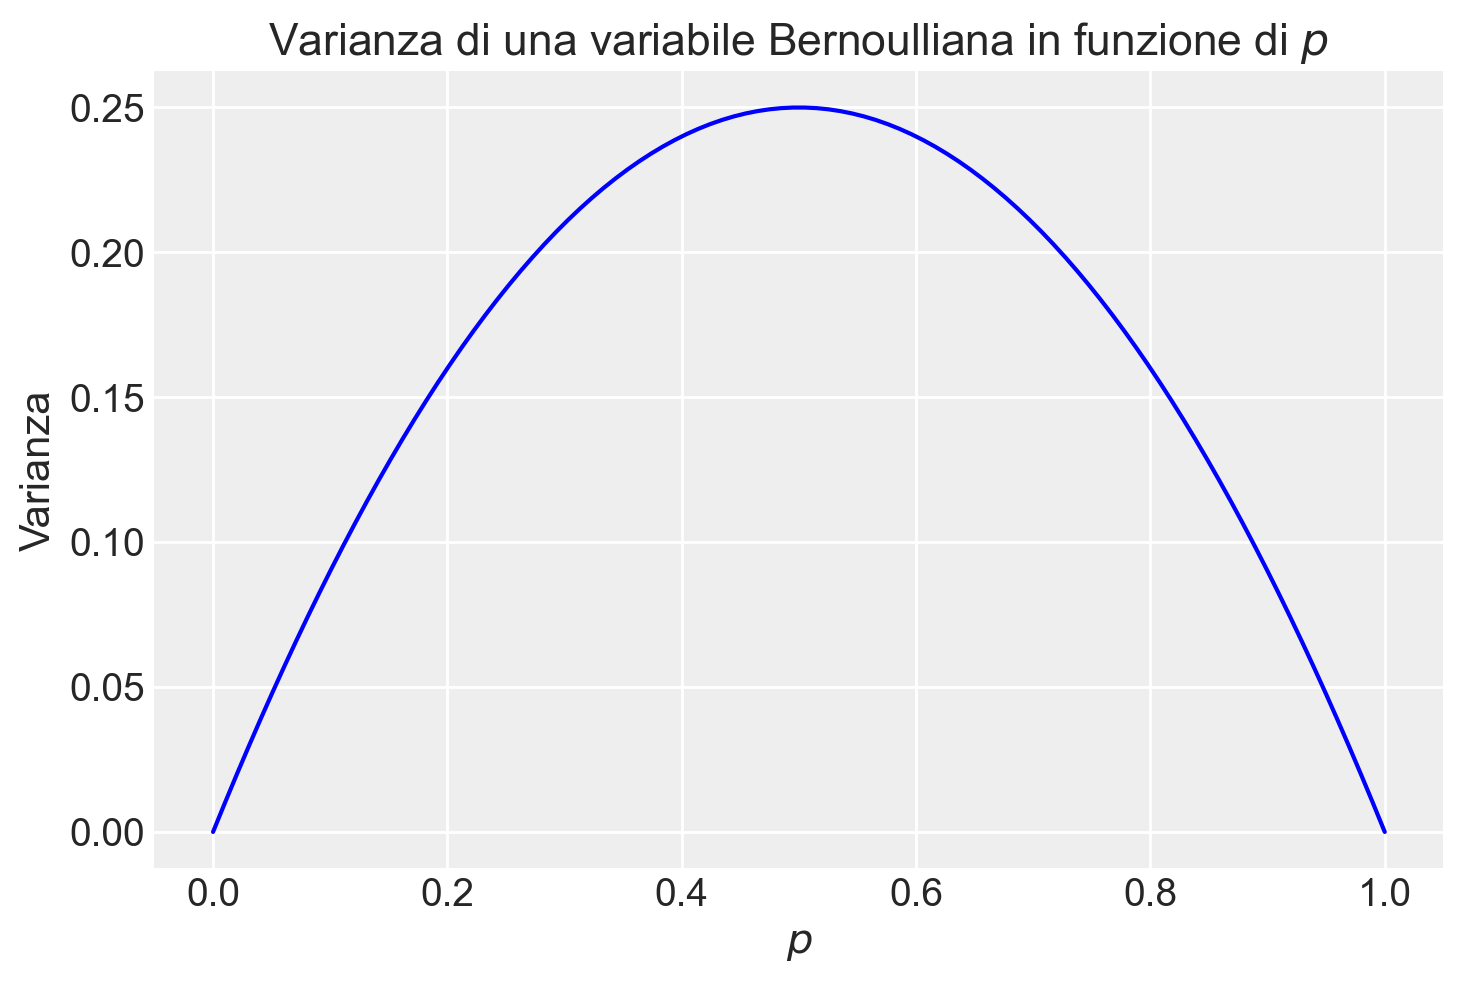

In [3]:
# Define p values between 0 and 1
p = np.linspace(0, 1, 100)

# Variance of a Bernoulli distribution is theta(1-theta)
variance = p * (1 - p)

plt.plot(p, variance, label='Varianza', color='blue')
plt.title('Varianza di una variabile Bernoulliana in funzione di $p$')
plt.xlabel('$p$')
plt.ylabel('Varianza')
plt.show()

Per indicare che la variabile casuale $X$ segue una distribuzione Bernoulliana di parametro $p$ Utilizziamo la notazione $X \sim \mathcal{Bern}(p)$, o in maniera equivalente $\mathcal{Bern}(X \mid p)$.

Ad esempio, nel caso del lancio di una moneta equilibrata, la variabile di Bernoulli assume i valori $0$ e $1$ con uguale probabilità di $\frac{1}{2}$. Pertanto, la funzione di massa di probabilità assegna una probabilità di $\frac{1}{2}$ sia per $X = 0$ che per $X = 1$, mentre la funzione di distribuzione cumulativa risulta essere $\frac{1}{2}$ per $X = 0$ e $1$ per $X = 1$.

Generiamo dei valori casuali dalla distribuzione di Bernoulli. Iniziamo con un singolo valore:

In [3]:
# Probabilità di successo (p)
p = 0.5

# Genera un valore casuale dalla distribuzione di Bernoulli
bernoulli_sample = rng.binomial(n=1, p=p)
print(bernoulli_sample)

1


Generiamo un campione di 10 valori:

In [11]:
# Genera un campione di 10 valori dalla distribuzione di Bernoulli
bernoulli_sample = rng.binomial(n=1, p=p, size=10)
print(bernoulli_sample)

[0 0 1 1 1 1 1 0 1 0]


## Distribuzione Binomiale

La distribuzione binomiale è una distribuzione di probabilità discreta che modella il numero di successi $y$ in un numero fissato $n$ di prove di Bernoulli indipendenti e identiche, dove ciascuna prova ha solo due esiti possibili: "successo" (rappresentato da "1") con probabilità $p$ o "insuccesso" (rappresentato da "0") con probabilità $1 - p$. La notazione utilizzata è la seguente:

$$
Y \sim \mathcal{Binom}(n, p).
$$

::: {#def-}
La distribuzione binomiale descrive la probabilità di osservare esattamente $y$ successi in $n$ prove di Bernoulli indipendenti:

$$
P(Y = y) = \binom{n}{y} p^{y} (1 - p)^{n - y} = \frac{n!}{y!(n - y)!} p^{y} (1 - p)^{n - y},
$$ {#eq-binom-distr}

dove $\binom{n}{y}$, noto come coefficiente binomiale, rappresenta il numero di modi possibili per ottenere $y$ successi in $n$ prove, e $p$ è la probabilità di successo in ciascuna prova.
:::

La distribuzione binomiale si presta bene a esempi classici come il lancio ripetuto di una moneta o l'estrazione di biglie da un'urna. Ad esempio, nel caso del lancio di una moneta, questa distribuzione descrive la probabilità di ottenere un determinato numero di "teste" in un certo numero di lanci, con ogni lancio che segue una distribuzione di Bernoulli con probabilità di successo $p$.

Una caratteristica interessante della distribuzione binomiale è la sua *proprietà di riproducibilità*: se due variabili casuali indipendenti, $y_1$ e $y_2$, seguono entrambe distribuzioni binomiali con lo stesso parametro $p$, ma con un diverso numero di prove ($n_1$ e $n_2$), la loro somma, $y = y_1 + y_2$, sarà ancora distribuita binomialmente, con parametri $n_1 + n_2$ e $p$.

### Calcolo delle Probabilità

Per chiarire il calcolo delle probabilità nella distribuzione binomiale, consideriamo una serie di prove di Bernoulli. Supponiamo di avere $n$ prove, con $y$ successi. La configurazione di questi risultati può essere rappresentata come:

$$
\overbrace{SS\dots S}^\text{$y$ successi} \overbrace{II\dots I}^\text{$n - y$ insuccessi}
$$

La probabilità di ottenere esattamente $y$ successi in una sequenza specifica di prove è pari a:

$$
p^y \cdot (1 - p)^{n - y},
$$

dove $p^y$ è la probabilità di ottenere $y$ successi, e $(1 - p)^{n - y}$ è la probabilità di ottenere $n - y$ insuccessi.

Tuttavia, siamo interessati alla probabilità complessiva di ottenere esattamente $y$ successi in *qualsiasi* ordine. Il numero di modi in cui ciò può avvenire è dato dal coefficiente binomiale $\binom{n}{y}$, che rappresenta tutte le possibili disposizioni dei successi e degli insuccessi nelle $n$ prove.

Quindi, moltiplicando la probabilità di una singola sequenza per il numero di sequenze possibili, otteniamo la probabilità di osservare esattamente $y$ successi:

$$
P(Y = y) = \binom{n}{y} p^y (1 - p)^{n - y}.
$$

Questo risultato corrisponde alla formula della distribuzione binomiale.

### Applicazioni Pratiche della Distribuzione Binomiale

Consideriamo un esempio pratico per illustrare l'applicazione della distribuzione binomiale. Supponiamo di osservare 2 successi in 4 prove Bernoulliane, dove la probabilità di successo in ogni prova è $p = 0.2$. La probabilità di ottenere questo risultato specifico è calcolata utilizzando l'eq. {eq}`eq-binom-distr`:

$$
P(Y=2) = \frac{4!}{2!(4-2)!} \cdot 0.2^{2} \cdot (1-0.2)^{4-2} = 0.1536.
$$

Questo calcolo può essere replicato in Python. Utilizzando il modulo `math`, possiamo calcolare direttamente:

In [6]:
n = 4
p = 0.2
y = 2

prob = math.comb(n, y) * p**y * (1 - p) ** (n - y)
print(prob)

0.15360000000000007


In alternativa, possiamo sfruttare la libreria SciPy per eseguire calcoli analoghi. SciPy offre una vasta gamma di funzioni per la gestione delle distribuzioni statistiche, tra cui la distribuzione binomiale.

In [7]:
stats.binom.pmf(y, n, p)

0.15359999999999993

Utilizzando `scipy.stats.binom.pmf(y, n, p)`, possiamo trovare le probabilità per ogni possibile valore $y$ in una distribuzione binomiale di parametri $n = 4$ e $\theta = 0.2$:

In [8]:
y = np.arange(0, n + 1)
print(y)

[0 1 2 3 4]


In [11]:
probabilities = stats.binom.pmf(y, n, p)
print(probabilities.round(3))

[0.41  0.41  0.154 0.026 0.002]


Visualizziamo la distribuzione di massa di probabilità:

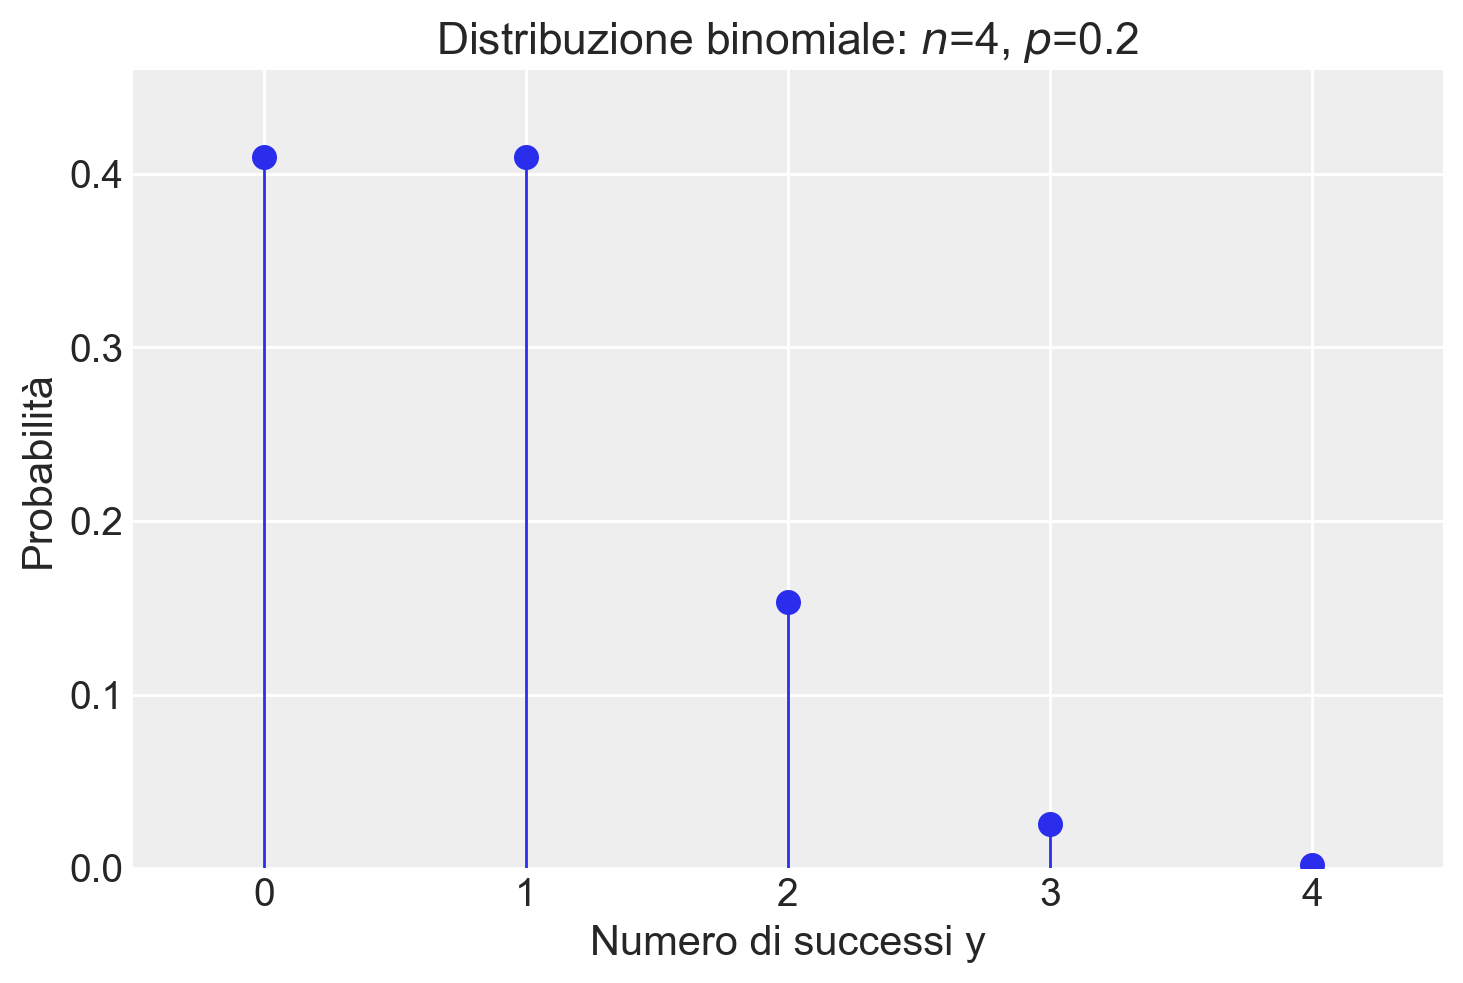

In [12]:
plt.figure()
plt.plot(y, probabilities, "o", ms=8)
plt.vlines(y, 0, probabilities, linestyles="-", lw=1)
plt.title(f"Distribuzione binomiale: $n$={n}, $p$={p}")
plt.xlabel("Numero di successi y")
plt.ylabel("Probabilità")
plt.xlim(-0.5, n + 0.5)
plt.ylim(0, max(probabilities) + 0.05)
plt.show()

Per esplorare ulteriormente, consideriamo la distribuzione di probabilità di diverse distribuzioni binomiali per due valori di $n$ e $\theta$. La seguente visualizzazione mostra come cambia la distribuzione al variare di $\theta$:

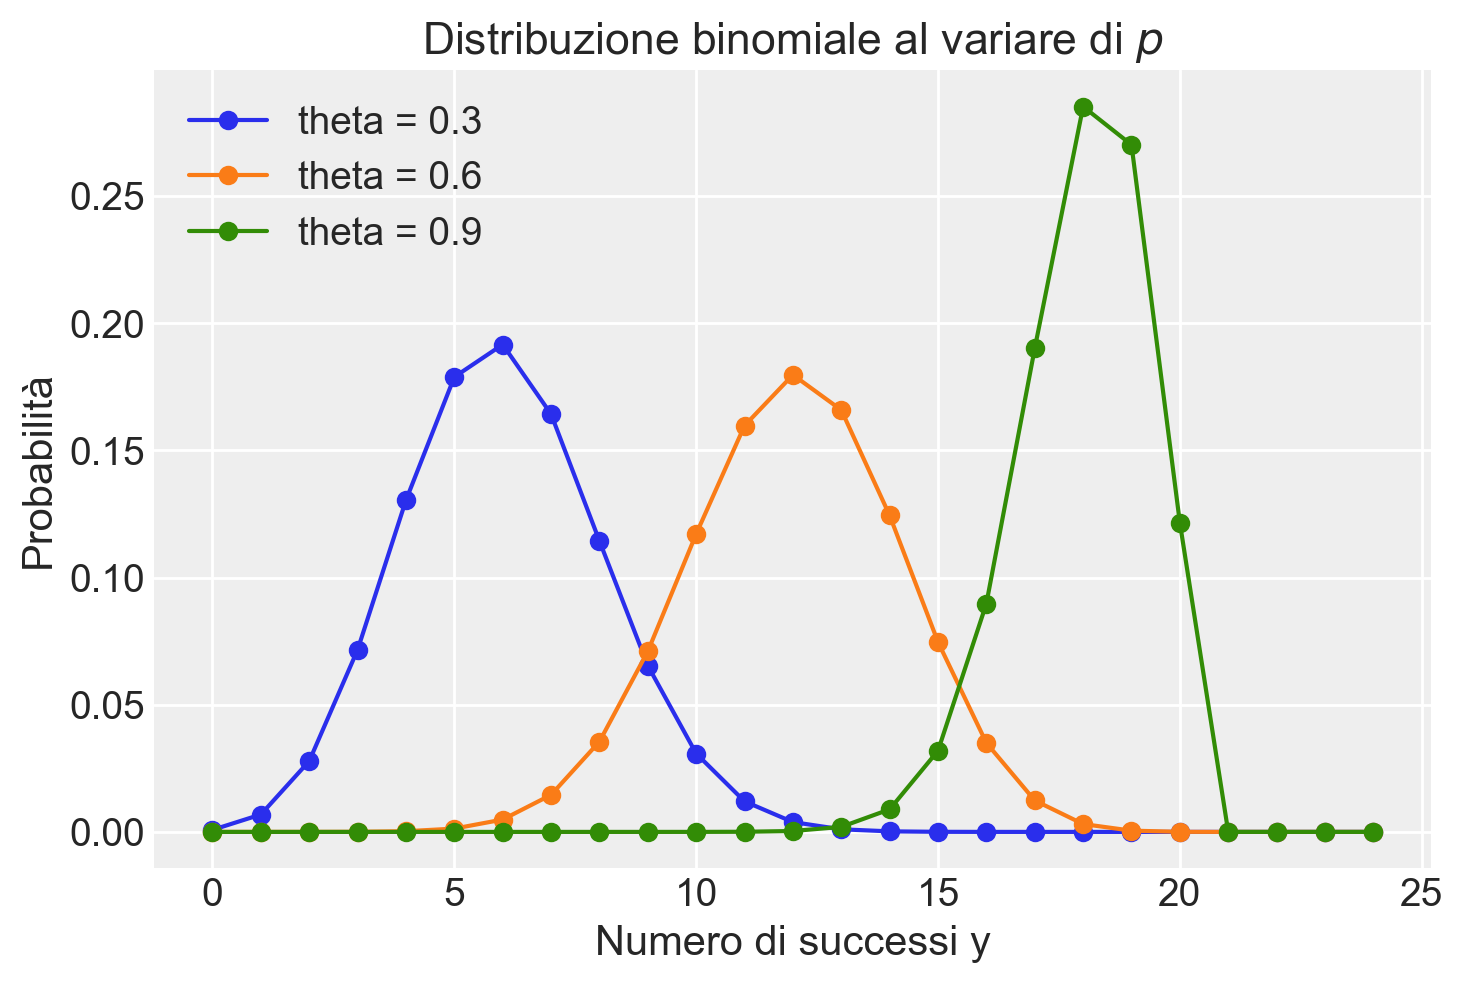

In [13]:
plt.figure()

for p in np.arange(0.3, 1.0, 0.3):
    y = np.arange(0, 25)
    binom_dist = stats.binom.pmf(y, 20, p)
    plt.plot(y, binom_dist, "-o", label=f"theta = {p:.1f}")

plt.xlabel("Numero di successi y")
plt.ylabel("Probabilità")
plt.title("Distribuzione binomiale al variare di $p$")
plt.legend()
plt.show()

Consideriamo un altro esempio. Lanciando $5$ volte una moneta onesta, qual è la probabilità che esca testa almeno due volte? Troviamo la soluzione usando `stats.binom.pmf()`.

In [15]:
stats.binom.pmf(2, n=5, p=0.5) + stats.binom.pmf(3, n=5, p=0.5) + stats.binom.pmf(4, n=5, p=0.5) +  stats.binom.pmf(5, n=5, p=0.5)

0.8125

In [16]:
np.sum([stats.binom.pmf(k, n=5, p=0.5) for k in range(2, 6)])

0.8125

Più facilmente, si trova la risposta usando la funzione di ripartizione `stats.binom.cdf`.

In [17]:
1 - stats.binom.cdf(1, n=5, p=0.5) 

0.8125

Rappresentiamo graficamente la funzione di ripartizione per una Binomiale di ordine $n$ = 5 e $\theta$ = 0.5.

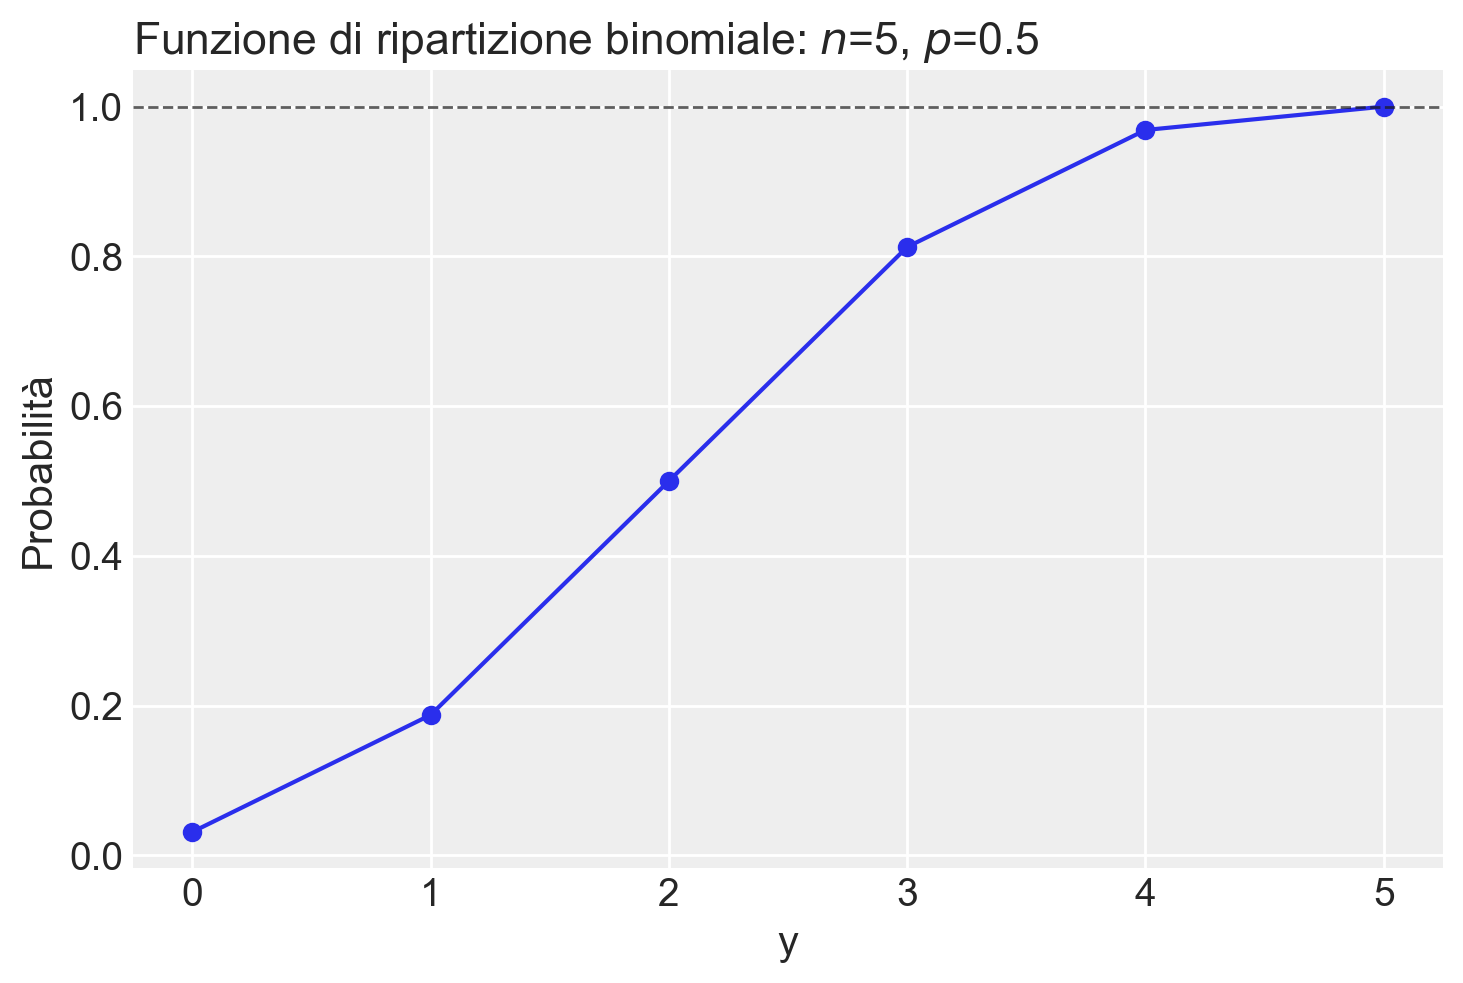

In [18]:
n = 5
theta = 0.5
y = np.arange(0, n+1)

plt.figure()
plt.plot(y, stats.binom.cdf(y, n=n, p=p))
plt.scatter(y, stats.binom.cdf(y, n=n, p=p))
plt.axhline(1, color="k", alpha=0.7, linestyle="--", lw=1)
plt.title(f"Funzione di ripartizione binomiale: $n$={n}, $p$={p}", loc="left")
plt.xlabel("y")
_ = plt.ylabel("Probabilità")

Un'altra funzione utile è quella che trova il numero di successi in una distribuzione binomiale che corrisponde ad una data probabilità (nella coda sinistra della funzione ripartizione). Per l'esempio presente:

In [19]:
target_probability = 1 - 0.8125
stats.binom.ppf(target_probability, n, p)

1.0

Utilizzando la funzione punto percentuale (PPF), che è l'inverso della funzione di distribuzione cumulativa (CDF), possiamo trovare il numero di successi corrispondente alla probabilità target di $1 - 0.8125 = 0.1875$ in una distribuzione binomiale con parametri $n = 5$ e $p = 0.5$. Il risultato mostra che il numero di successi cercato per questa probabilità target è 1.

Facciamo un altro esempio. Consideriamo la probabilità cumulativa $P(Y \leq 4)$ per una variabile casuale $Y$ che segue una distribuzione binomiale con numero di prove $n = 10$ e probabilità di successo $p = 0.2$. La funzione `stats.binom.cdf(4, n=10, p=0.2)` calcola la probabilità che ci siano al massimo 4 successi in 10 tentativi, dove la probabilità di successo in ogni tentativo è del 20%.

In [20]:
target_probability = stats.binom.cdf(4, n=10, p=0.2)
target_probability

0.9672065024

Di conseguenza, la funzione inversa è:

In [21]:
stats.binom.ppf(target_probability, n=10, p=0.2)

4.0

Per generare una sequenza di valori casuali seguendo una distribuzione binomiale possiamo utilizzare la funzione `random()` di NumPy. Dopo aver inizializzato `rng = np.random.default_rng(RANDOM_SEED)`, per esempio, 

In [22]:
rng = np.random.default_rng(42)

possiamo impiegare `rng` per generare valori casuali da una distribuzione binomiale: 

In [23]:
x = rng.binomial(p=0.5, n=5, size=30)
print(*x)

3 2 4 3 1 5 3 3 1 2 2 4 3 4 2 2 3 1 4 3 3 2 5 4 3 2 2 1 1 3


Per una discussione sulla generazione di numeri pseudo-casuali in Python, si veda il capitolo {ref}`appendix-rng`.

### Valore atteso e deviazione standard

La media (numero atteso di successi in $n$ prove) e la deviazione standard di una distribuzione binomiale si calcolano nel seguente modo:

$$
\begin{align}
\mu    &= np,  \notag \\
\sigma &= \sqrt{np(1-p)}.
\end{align}
$$ {#eq-mean-var-binomial}

*Dimostrazione.* Dato che $Y$ rappresenta la somma di $n$ prove di Bernoulli indipendenti $Y_i$, possiamo scrivere:

$$
\begin{align}
\mathbb{E}(Y) &= \mathbb{E}\left( \sum_{i=1}^n Y_i \right) = \sum_{i=1}^n \mathbb{E}(Y_i) = np, \\
\mathbb{V}(Y) &= \mathbb{V} \left( \sum_{i=1}^n Y_i \right) = \sum_{i=1}^n \mathbb{V}(Y_i) = np(1-p).
\end{align}
$$

Pertanto, la deviazione standard è data da $\sigma = \sqrt{np(1-p)}$.

Per esempio, prendiamo in considerazione il caso di un esperimento in cui vengono lanciate quattro monete, ciascuna con una probabilità di ottenere testa (successo) pari a $p = 0.2$. Calcoliamo il valore atteso e la varianza per questo esperimento.

Il valore atteso, $\mu$, rappresenta il numero medio di teste che ci aspettiamo di ottenere in ciascun lancio. Per la distribuzione binomiale, questo è dato da $\mu = n p$, dove $n$ è il numero di prove (lanci di monete). Nel nostro caso, con $n = 4$ e $p = 0.2$, abbiamo:

$$
\mu = n p = 4 \times 0.2 = 0.8.
$$

Questo significa che, in media, ci aspettiamo di ottenere circa 0.8 teste per ogni serie di quattro lanci.

Per quanto riguarda la varianza, che misura quanto i risultati individuali tendono a differire dalla media, nella distribuzione binomiale è calcolata come $n p (1-p)$. Pertanto, per il nostro esperimento:

$$
\text{Varianza} = n p (1-p) = 4 \times 0.2 \times (1 - 0.2) = 0.64.
$$

La varianza di 0.64 suggerisce una certa dispersione intorno al valore medio di 0.8 teste.

Per confermare queste aspettative teoriche, possiamo eseguire una simulazione. Creiamo una serie di esperimenti simulati in cui lanciamo quattro monete per un gran numero di volte, registrando il numero di teste ottenute in ogni serie. Calcoliamo poi la media e la varianza dei risultati ottenuti per vedere quanto si avvicinano ai valori teorici calcolati.

In [8]:
x = rng.binomial(p=.2, n=4, size=1000000)

In [9]:
np.mean(x)

0.79956

In [10]:
np.var(x, ddof=0)

0.6397598064000003

### Funzioni Python associate alle distribuzioni di probabilità

La seguente tabella riassume le funzioni di Python utilizzate per manipolare le distribuzioni di probabilità, illustrando i casi della distribuzione Binomiale e della Normale.

| Tipo                              | Esempio: Binomiale (y &#124; n, p)     | Esempio: Normale (y &#124; μ, σ)       |
|:----------------------------------|:---------------------------------------|:---------------------------------------|
| Funzione di verosimiglianza       | `binom.pmf(y, n, p)`                   | `norm.pdf(y, μ, σ)`                    |
| Prob Y=y                          | `binom.pmf(y, n, p)`                   | sempre 0 per variabili continue        |
| Prob Y ≥ y, Y ≤ y, y1 < Y < y2    | `binom.cdf(y, n, p)` o `binom.sf(y, n, p)` | `norm.cdf(y, μ, σ)` o `norm.sf(y, μ, σ)` |
| Inversa della CDF                 | `binom.ppf(q, n, p)`                   | `norm.ppf(q, μ, σ)`                    |
| Generazione di dati simulati      | `rng.binomial(n, p, size)`             | `rng.normal(μ, σ, size)`               |

In seguito, useremo altre distribuzioni come Uniforme, Beta, ecc., ognuna delle quali ha un proprio insieme di funzioni disponibili in Python tramite il modulo `scipy.stats`. Potete trovare una lista completa di queste distribuzioni nella documentazione ufficiale.

- **`pmf`** (probability mass function) viene utilizzata per distribuzioni discrete come la Binomiale, mentre **`pdf`** (probability density function) si applica alle distribuzioni continue, come la Normale.
- **`cdf`** (cumulative distribution function) e **`sf`** (survival function, che corrisponde a $1 - \text{cdf}$) permettono di calcolare le probabilità cumulative.
- **`ppf`** (percent point function) è l'inversa della `cdf`, e si usa per determinare il valore della variabile corrispondente a una certa percentuale di osservazioni.
- **`rvs`** (random variates) serve a generare campioni casuali simulati secondo una determinata distribuzione.

## Distribuzione Discreta Uniforme

La distribuzione discreta uniforme è un tipo particolare di distribuzione di probabilità, dove ogni risultato in un insieme finito e discreto $S$ ha la stessa probabilità $p$ di verificarsi. Questa distribuzione è caratterizzata dalla sua semplicità e dalla sua proprietà fondamentale di equiprobabilità.

Consideriamo un esempio pratico con una variabile casuale discreta $X$, che può assumere valori nell'insieme $\{1, 2, \dots, N\}$. Un'istanza classica di questa distribuzione si verifica quando si sceglie casualmente un numero intero tra 1 e $N$, inclusi. Se $X$ rappresenta il numero selezionato, allora la somma delle probabilità di tutti i possibili valori di $X$ deve totalizzare 1, come indicato dalla formula di normalizzazione:

$$
\sum_{i=1}^N P(X_i) = Np = 1.
$$

Di conseguenza, la probabilità che $X$ assuma un valore specifico $x$ è uniformemente distribuita:

$$
P(X = x) = \frac{1}{N},
$$

indicando che ogni evento ha la stessa probabilità di verificarsi.

Il valore atteso, o la media, di $X$ ci dà un'idea del risultato medio atteso e si calcola come:

$$
\mathbb{E}(X) = \sum_{x=1}^N x \cdot \frac{1}{N} = \frac{1}{N} \cdot \sum_{x=1}^N x.
$$

A questo punto, dobbiamo calcolare la somma $\sum_{x=1}^{N} x$, che è la somma dei primi $N$ numeri naturali. Questa somma è data dalla formula:

$$
\sum_{x=1}^{N} x = \frac{N(N + 1)}{2}.
$$

Sostituendo questa formula nel nostro calcolo del valore atteso, otteniamo:

$$
\mathbb{E}(X) = \frac{1}{N} \cdot \frac{N(N + 1)}{2} = \frac{N + 1}{2}.
$$

Quindi, abbiamo dimostrato che il valore atteso $ \mathbb{E}(X) $ per una variabile casuale $X$ che assume valori interi uniformemente distribuiti da 1 a $N$ è $\frac{N + 1}{2}$. 

Per determinare quanto i valori di $X$ si disperdono attorno al valore medio, calcoliamo la varianza. Il primo passo è calcolare $\mathbb{E}(X^2)$, il valore atteso del quadrato di $X$. Per una variabile casuale discreta uniforme, questo si ottiene moltiplicando ogni valore al quadrato per la sua probabilità (che è $1/N$ per tutti i valori) e sommando i risultati:

$$
\mathbb{E}(X^2) = \frac{1}{N} \cdot \sum_{x=1}^N x^2
$$

Usando l'identità per la somma dei quadrati dei primi $N$ numeri naturali:

$$
1^2 + 2^2 + \dots + N^2 = \frac{N(N + 1)(2N + 1)}{6}
$$

possiamo sostituirla per trovare $\mathbb{E}(X^2)$:

$$
\mathbb{E}(X^2) = \frac{1}{N} \cdot \frac{N(N + 1)(2N + 1)}{6} = \frac{(N + 1)(2N + 1)}{6}
$$

La varianza di $X$, denotata con $\mathbb{V}(X)$, si calcola usando la formula:

$$
\mathbb{V}(X) = \mathbb{E}(X^2) - [\mathbb{E}(X)]^2
$$

Abbiamo già stabilito che $\mathbb{E}(X) = \frac{N + 1}{2}$ e $\mathbb{E}(X^2) = \frac{(N + 1)(2N + 1)}{6}$. Sostituendo questi valori nella formula della varianza, otteniamo:

$$
\mathbb{V}(X) = \frac{(N + 1)(2N + 1)}{6} - \left(\frac{N + 1}{2}\right)^2
$$

Per semplicare l'espressione della varianza, dobbiamo sottrarre il quadrato di $\mathbb{E}(X)$ da $\mathbb{E}(X^2)$:

$$
\begin{align*}
\mathbb{V}(X) &= \frac{(N + 1)(2N + 1)}{6} - \left(\frac{N + 1}{2}\right)^2 \\
&= \frac{(N + 1)(2N + 1)}{6} - \frac{(N + 1)^2}{4} \\
&= \frac{2(N + 1)(2N + 1)}{12} - \frac{3(N + 1)^2}{12} \\
&= \frac{(N + 1)(2(2N + 1) - 3(N + 1))}{12} \\
&= \frac{(N + 1)(4N + 2 - 3N - 3)}{12} \\
&= \frac{(N + 1)(N - 1)}{12}
\end{align*}
$$

Quindi, la varianza $\mathbb{V}(X)$ di una variabile casuale uniforme discreta $X$ che assume valori da 1 a $N$ è $\frac{(N + 1)(N - 1)}{12}$, il che mostra come la dispersione dei valori attorno al loro valore medio dipenda dalla grandezza di $N$. Questa formula fornisce la varianza di una variabile casuale in una distribuzione discreta uniforme, offrendo una misura quantitativa della dispersione dei valori attorno al loro valore medio. 

## Distribuzione di Poisson

La **distribuzione di Poisson** è una distribuzione di probabilità discreta utilizzata per modellare il numero di eventi che si verificano in un dato intervallo di tempo o spazio, quando tali eventi sono indipendenti e accadono a un tasso costante.

Siméon Denis Poisson, un matematico francese, sviluppò questa teoria nel 1837. La distribuzione prende il suo nome perché descrive il processo di conteggio degli eventi casuali che si verificano indipendentemente l'uno dall'altro in un determinato intervallo.

La variabile casuale $Y$ denota il numero di eventi, e il parametro $\lambda$ rappresenta il tasso medio di occorrenza degli eventi in quell'intervallo.

La funzione di massa di probabilità della distribuzione di Poisson è:

$$
P(Y = y \mid \lambda) = \frac{\lambda^y \cdot e^{-\lambda}}{y!}, \quad \text{per} \quad y = 0, 1, 2, \ldots
$$

dove:

- $P(Y = y \mid \lambda)$ è la probabilità di osservare esattamente $y$ eventi,
- $\lambda$ è il tasso medio di eventi,
- $y$ è il numero di eventi, un intero non negativo.

Una proprietà chiave della distribuzione di Poisson è che il **valore atteso** ($E[Y]$) e la **varianza** ($Var[Y]$) sono entrambi pari a $\lambda$. Questo implica che con l'aumento di $\lambda$, la variabilità degli eventi aumenta proporzionalmente, riflettendo una maggiore dispersione dei dati attorno al valore medio.

Quale esempio, presentiamo qui sotto un grafico con la distribuzione di Poisson di parametro $\lambda$ = 2.

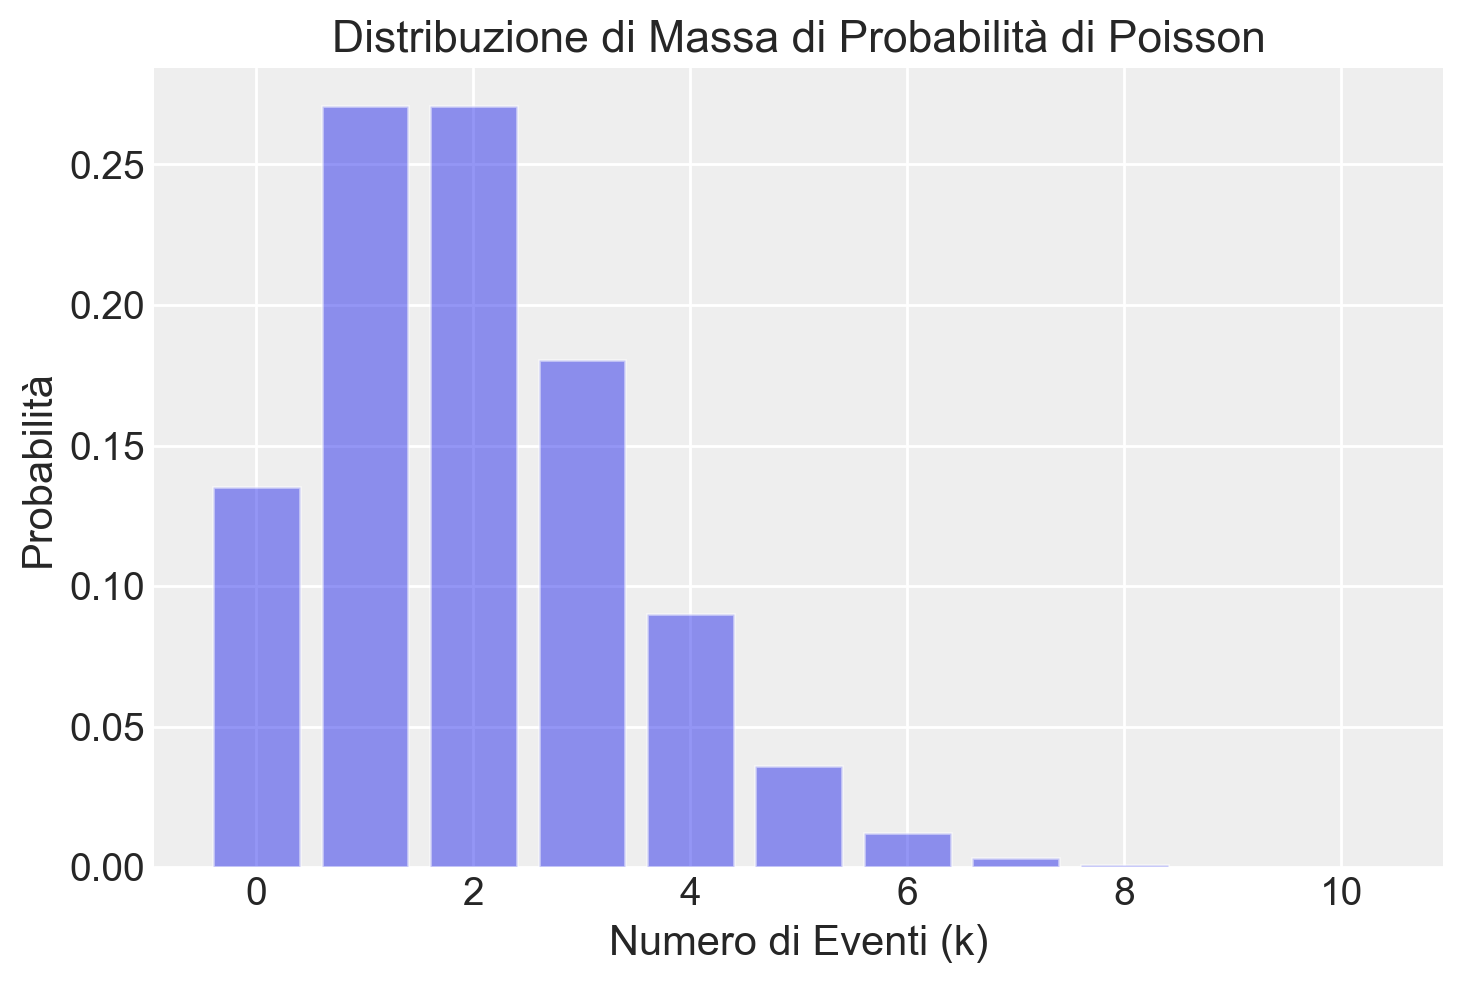

In [13]:
# Tasso medio di occorrenza di eventi
lambda_value = 2

# Creazione della distribuzione di Poisson con il tasso medio specificato
poisson_dist = stats.poisson(mu=lambda_value)

# Calcolo della probabilità di avere un certo numero di eventi
k_values = range(0, 11)  # Consideriamo valori da 0 a 10

# Calcolo delle probabilità corrispondenti
probabilities = poisson_dist.pmf(k_values)

plt.figure()

# Plot della distribuzione di massa di probabilità
plt.bar(k_values, probabilities, alpha=0.5)
plt.xlabel('Numero di Eventi (k)')
plt.ylabel('Probabilità')
plt.title('Distribuzione di Massa di Probabilità di Poisson')
plt.show()

La probabilità di ottenere un singolo valore $y$ si calcola utilizzando la funzione di massa di probabilità (`pmf`), dove l'argomento `k` rappresenta il numero di eventi ($y$) e `mu` è uguale a $\lambda$. Ad esempio, per determinare la probabilità di osservare esattamente tre eventi ($y = 3$) con un tasso di occorrenza $\lambda$ = 2, indicata come $P(Y = 3)$, si utilizza la seguente istruzione:

In [4]:
stats.poisson.pmf(k=3, mu=2)

0.18044704431548356

La probabilità di non più di 3 eventi, indicata come $P(Y \leq 3)$, si ottiene nel modo seguente:

In [15]:
p = stats.poisson.pmf(k=0, mu=2) + stats.poisson.pmf(k=1, mu=2) + stats.poisson.pmf(k=2, mu=2) + stats.poisson.pmf(k=3, mu=2)
p

0.857123460498547

La funzione `ppf`, con la probabilità e $\lambda$ come argomenti, restituisce il quantile della distribuzione di Poisson. Ad esempio, nel caso precedente, abbiamo:

In [76]:
stats.poisson.ppf(p, mu=2)

3.0

La funzione di distribuzione cumulativa si calcola utilizzando `cdf`. Ad esempio, per calcolare $P(Y \leq 3)$ si utilizza:

In [77]:
stats.poisson.cdf(3, mu=2)

0.857123460498547

La generazione di numeri casuali dalla distribuzione di Poisson può essere ottenuta utilizzando `rng`. Ad esempio:

In [16]:
mu = 2
x = rng.poisson(mu, 1000000)

Verifichiamo:

In [17]:
np.mean(x)

1.998219

In [18]:
np.var(x, ddof=0)

1.996941828039

**Esempio.** I dati provenienti dal reparto di maternità di un certo ospedale mostrano che c'è una media storica di 4.5 bambini nati in questo ospedale ogni giorno. Qual è la probabilità che domani nascano 6 bambini in questo ospedale?

Per prima cosa, calcoliamo la probabilità teorica di questo evento utilizzando dpois(). Il numero di successi che stiamo considerando è 6, quindi imposteremo x = 6. Inoltre, questa media storica di 4,5 nascite al giorno è il nostro valore per lambda, quindi imposteremo lambda = 6.

In [17]:
p = stats.poisson.pmf(k=6, mu=4.5)
print(f"La probabilità che domani in questo ospedale nasceranno 6 bambini è: {p:.4f}")

La probabilità che domani in questo ospedale nasceranno 6 bambini è: 0.1281


Simuliamo le nascite in questo ospedale per un anno (n = 365) utilizzando la funzione `np.random.poisson` e confrontiamo la proporzione di giorni in cui ci sono stati 6 nascite con la probabilità teorica che abbiamo calcolato in precedenza. 

In [18]:
# Simuliamo le nascite in un anno (365 giorni) con una media storica di 4.5 nascite al giorno
n_days = 365
mean_births_per_day = 4.5
simulated_births = rng.poisson(mean_births_per_day, n_days)

# Calcoliamo la proporzione di giorni in cui sono nati esattamente 6 bambini nella simulazione
proportion_six_births = np.mean(simulated_births == 6)

# Stampiamo la proporzione calcolata
print(f"La proporzione di giorni in cui, nella simulazione, sono nati 6 bambini è: {proportion_six_births:.4f}")

La proporzione di giorni in cui, nella simulazione, sono nati 6 bambini è: 0.1342


Visualizziamo i risultati della simulazione.

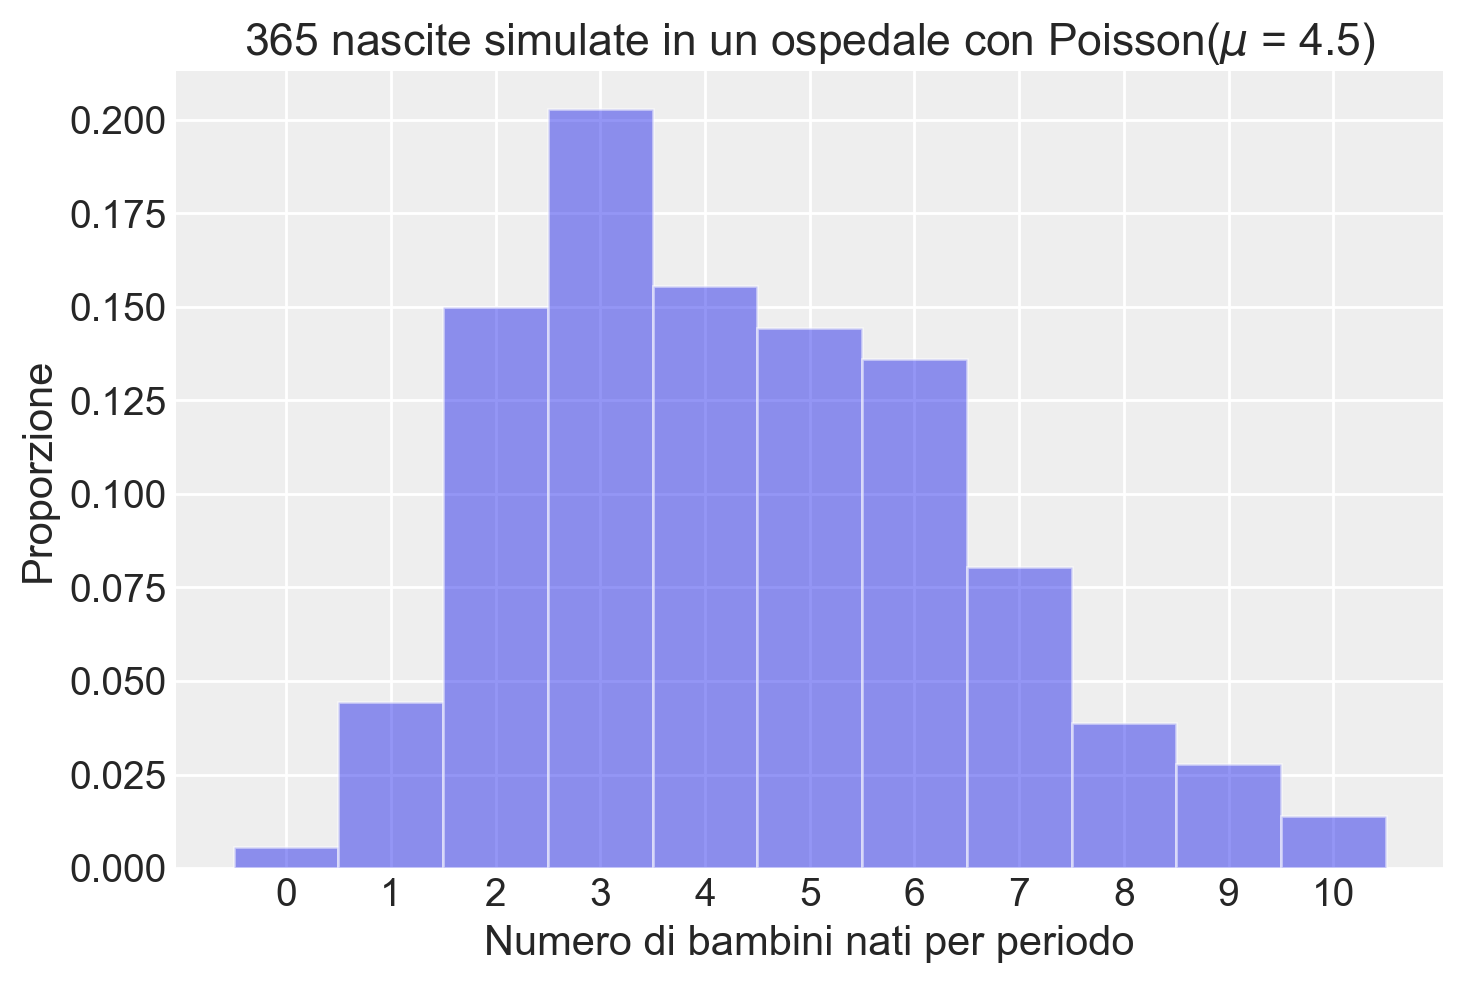

In [19]:
# Visualizziamo l'istogramma delle nascite simulate
plt.hist(simulated_births, bins=np.arange(12) - 0.5, density=True, alpha=0.5)
plt.xlabel('Numero di bambini nati per periodo')
plt.ylabel('Proporzione')
plt.title('365 nascite simulate in un ospedale con Poisson($\\mu$ = 4.5)')
plt.xticks(np.arange(11));

Calcoliamo la probabilità teorica della nascita di più di 6 bambini in un giorno.

In [8]:
prob_more_than_six = 1 - stats.poisson.cdf(6, mean_births_per_day)
print(f"La probabilità teorica di più di 6 bambini nati è: {prob_more_than_six:.4f}")

La probabilità teorica di più di 6 bambini nati è: 0.1689


Calcoliamo la proporzione corrispondente nella simulazione

In [9]:
proportion_more_than_six = np.mean(simulated_births > 6)
print(f"La proporzione di giorni con più di 6 bambini nati nella simulazione è: {proportion_more_than_six:.4f}")

La proporzione di giorni con più di 6 bambini nati nella simulazione è: 0.1808


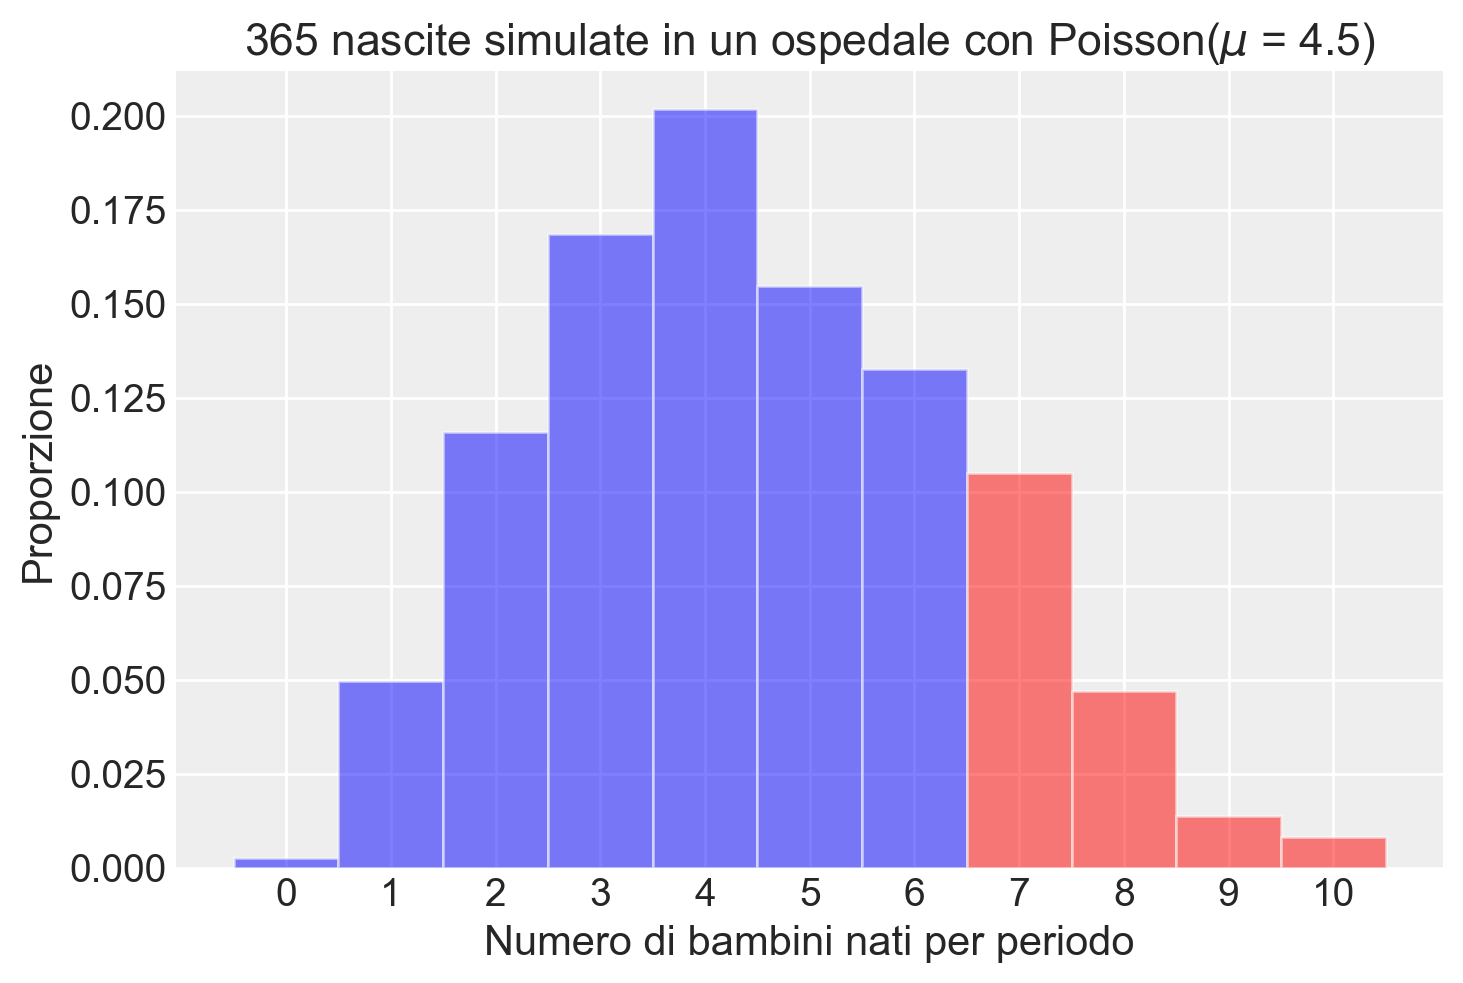

In [10]:
bins = np.arange(12) - 0.5
hist, edges = np.histogram(simulated_births, bins=bins, density=True)

# Disegna l'istogramma
for i in range(len(hist)):
    if edges[i] >= 6:
        color = 'red'  # Colore per x > 6
    else:
        color = 'blue'  # Colore per x <= 6
    plt.bar(edges[i], hist[i], width=1, align='edge', color=color, alpha=0.5)

# Imposta etichette e titolo
plt.xlabel('Numero di bambini nati per periodo')
plt.ylabel('Proporzione')
plt.title('365 nascite simulate in un ospedale con Poisson($\\mu$ = 4.5)')
_ = plt.xticks(np.arange(11))

## Distribuzione Beta-Binomiale

La distribuzione beta-binomiale rappresenta una estensione della distribuzione binomiale che tiene conto della variabilità nella probabilità di successo tra i vari tentativi. Viene descritta da tre parametri principali: $N$, $\alpha$ e $\beta$.

Nel dettaglio, la funzione di massa di probabilità per la distribuzione beta-binomiale è data da:

$$
\text{BetaBinomiale}(y | N, \alpha, \beta) = \binom{N}{y} \cdot \frac{B(y + \alpha, N - y + \beta)}{B(\alpha, \beta)},
$$ {#eq-beta-binom-formula}

dove:

- $y$ indica il numero di successi osservati.
- $N$ rappresenta il numero totale di tentativi.
- $\alpha$ e $\beta$ sono i parametri della distribuzione beta, che modellano la variabilità nella probabilità di successo tra i tentativi.

La funzione $B(u, v)$, nota come funzione beta, è definita tramite l'uso della funzione gamma $\Gamma$, secondo la formula:

$$
B(u, v) = \frac{\Gamma(u) \Gamma(v)}{\Gamma(u + v)},
$$

dove la funzione gamma $\Gamma$ generalizza il concetto di fattoriale a numeri reali e complessi.

L'importanza della distribuzione beta-binomiale deriva dalla sua capacità di modellare situazioni in cui la probabilità di successo non è fissa, ma segue una distribuzione di probabilità, specificatamente una distribuzione beta. Ciò la rende particolarmente adatta per applicazioni in cui le probabilità di successo cambiano in maniera incerta da un tentativo all'altro, come può avvenire in contesti di ricerca clinica o in studi comportamentali. Rispetto alla distribuzione binomiale, che assume una probabilità di successo costante per tutti i tentativi, la beta-binomiale offre una rappresentazione più realistica e flessibile per dati empirici che presentano variabilità nelle probabilità di successo.

## La Distribuzione Categorica

La **distribuzione categorica** è una distribuzione di probabilità discreta utilizzata per modellare eventi con più esiti distinti e non ordinati. È una generalizzazione della distribuzione Bernoulliana, che si limita a due esiti (successo e fallimento), ed è utile in situazioni in cui un evento può produrre uno tra molti esiti, ciascuno con una probabilità associata.

### Definizione e Funzione di Massa di Probabilità

La distribuzione categorica può essere caratterizzata dalla sua funzione di massa di probabilità (PMF):

$$
p(X = x) = \mathcal{Categorical}(X \mid p) = \prod_{k=1}^K p_k^{I_{x=k}},
$$

dove:

- $K$ è il numero di esiti possibili,
- $p_k$ è la probabilità associata al $k$-esimo esito,
- $I_{x=k}$ è una funzione indicatrice che vale 1 se $x = k$ e 0 altrimenti.

Le probabilità $p_k$ formano un vettore:

$$
p = 
\begin{pmatrix}
p_1\\ 
p_2\\
\dots \\ 
p_K
\end{pmatrix},
$$

che soddisfa la condizione:

$$
\sum_{k=1}^K p_k = 1.
$$

In altre parole, la somma delle probabilità di tutti i possibili esiti è pari a 1, come richiesto da qualsiasi distribuzione di probabilità.

### Proprietà Principali

1. **Esiti Multipli**: La distribuzione categorica è adatta per modellare eventi con più di due esiti distinti. Un esempio classico è il lancio di un dado a sei facce, dove ciascun esito ha una probabilità di $\frac{1}{6}$ nel caso di un dado equo.

2. **Generalizzazione della Distribuzione Bernoulliana**: La distribuzione categorica è una generalizzazione della distribuzione Bernoulliana. In particolare, la distribuzione Bernoulliana rappresenta un caso speciale della distribuzione categorica con due sole categorie ($K = 2$), come il risultato di un lancio di una moneta (testa o croce).

3. **Probabilità in Forma di Simplex**: Le probabilità degli esiti nella distribuzione categorica sono rappresentate da un vettore simplex. Un **simplex** è un vettore di probabilità non negative che sommano a 1, rispettando la condizione fondamentale delle distribuzioni di probabilità.

### Utilizzo della Distribuzione Categorica in Stan

In Stan, la distribuzione categorica è impiegata per modellare la probabilità di un singolo esito tra diversi possibili risultati. Questo è particolarmente utile in contesti come le **catene di Markov**, dove ogni stato può evolvere verso uno tra molti altri stati con una certa probabilità.

Ad esempio, supponiamo di avere una **matrice di transizione** $P$ che descrive le probabilità di passaggio tra stati in una catena di Markov. Ogni riga della matrice $P$ rappresenta una distribuzione categorica, in cui le voci corrispondono alle probabilità di transizione dallo stato corrente agli stati successivi. La distribuzione `categorical` può essere utilizzata per modellare la probabilità di osservare una specifica transizione.

Consideriamo un esempio pratico: se uno studente si trova nello stato $A$ al tempo $t$, e le probabilità di transizione agli stati $A$, $B$ e $C$ sono rispettivamente $0.7$, $0.2$ e $0.1$, possiamo modellare la probabilità che l'evento successivo sia una transizione verso uno di questi stati usando la distribuzione categorica:

$$
X \sim \text{categorical}(0.7, 0.2, 0.1)
$$

Qui, la variabile aleatoria $X$ segue una distribuzione `categorical` con le probabilità assegnate ai tre possibili esiti (stati $A$, $B$, e $C$). Questo consente di simulare il prossimo stato in base alle probabilità specificate.

#### Applicazione nelle Catene di Markov

La distribuzione `categorical` è particolarmente efficace nei **modelli di catene di Markov**, dove descrive le transizioni tra stati in un sistema dinamico. Ogni transizione tra stati è trattata come un evento discreto con più esiti possibili, ciascuno con la propria probabilità. Questo approccio è utile per modellare sistemi con molteplici stati e transizioni complesse, garantendo flessibilità e precisione nella simulazione delle dinamiche del sistema.

In sintesi, la distribuzione categorica in Stan permette di modellare eventi con molteplici esiti in modo semplice ed efficace, rendendola uno strumento prezioso per descrivere fenomeni dinamici, come le catene di Markov o qualsiasi altro processo con transizioni probabilistiche tra stati.

Di seguito, esaminiamo come simulare una distribuzione categorica utilizzando numpy e come creare un istogramma per visualizzare la distribuzione di massa:

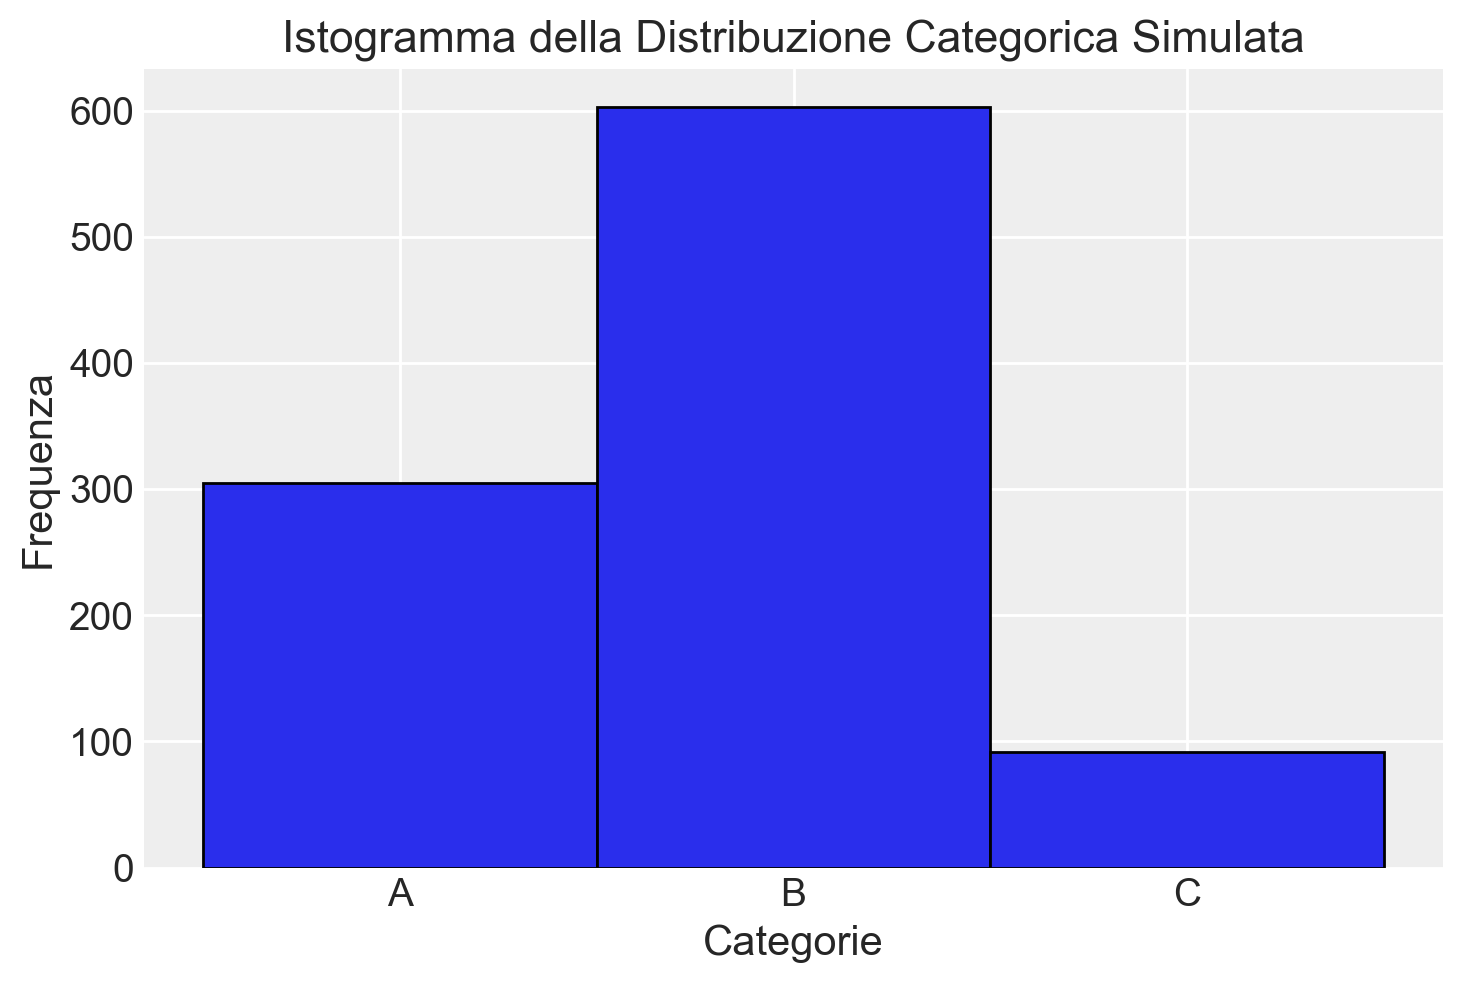

In [3]:
# Definire le probabilità della distribuzione categorica
probabilities = [0.6, 0.3, 0.1]  # Le probabilità per ciascun esito

# Definire le categorie
categories = ["A", "B", "C"]

# Numero di campioni da generare
n_samples = 1000

# Simulare la distribuzione categorica
samples = np.random.choice(categories, size=n_samples, p=probabilities)

# Creare un istogramma dei risultati
plt.hist(samples, bins=np.arange(len(categories) + 1) - 0.5, edgecolor="black")
plt.xticks(range(len(categories)), categories)
plt.xlabel("Categorie")
plt.ylabel("Frequenza")
plt.title("Istogramma della Distribuzione Categorica Simulata")
plt.show()

Concludiamo chiarendo la relazione tra la distribuzione categorica e quella multinomiale.

La **distribuzione categorica** descrive l'esito di una singola prova con $K$ categorie, ciascuna con una probabilità associata. È una generalizzazione della distribuzione Bernoulliana, che prevede solo due esiti (successo o fallimento).

**Esempio**: Lanciare un dado a sei facce una volta. Ciascuna faccia ha una probabilità di $\frac{1}{6}$.

La **distribuzione multinomiale** estende la distribuzione binomiale a più categorie e descrive il numero di esiti su un insieme di prove indipendenti che seguono una distribuzione categorica.

**Esempio**: Lanciare un dado dieci volte e contare quante volte appare ciascuna faccia.

La distribuzione categorica è un caso particolare della multinomiale quando si effettua una sola prova ($n = 1$). Nella distribuzione categorica otteniamo un singolo esito, mentre nella multinomiale otteniamo un conteggio di esiti su più prove.

### Implementazioni in `NumPy`
- **`numpy.random.choice`**: Campiona da una distribuzione categorica, restituendo uno o più esiti secondo le probabilità specificate.
- **`numpy.random.multinomial`**: Usata per la distribuzione multinomiale, può simulare una distribuzione categorica impostando $n = 1$.

## La Distribuzione Geometrica

La distribuzione geometrica è una distribuzione discreta che modella il numero di tentativi necessari per ottenere il primo successo in una sequenza di prove Bernoulliane indipendenti. Ogni prova ha due possibili esiti: *successo* (con probabilità $p$) o *fallimento* (con probabilità $1 - p$).

In termini pratici, la distribuzione geometrica può essere utilizzata per rispondere alla domanda: *"Quante prove falliscono prima di ottenere il primo successo?"*. 

### Funzione di Massa di Probabilità

La funzione di massa di probabilità (PMF) della distribuzione geometrica è definita come:

$$
P(X = k) = (1 - p)^{k-1} \cdot p
$$

dove:

- $X$ è il numero di tentativi fino al primo successo (incluso il tentativo in cui si ottiene il successo).
- $p$ è la probabilità di successo in ogni prova.
- $k$ è il numero di prove necessarie per ottenere il primo successo (un numero intero positivo, $k \geq 1$).

### Proprietà della Distribuzione Geometrica

1. **Valore Atteso (Media)**: La media del numero di prove fino al primo successo è data da:

$$
\mathbb{E}[X] = \frac{1}{p}.
$$

Questo significa che, in media, ci si aspetta di avere $\frac{1}{p}$ prove prima di ottenere un successo.

2. **Varianza**: La varianza della distribuzione geometrica è:

$$
\text{Var}(X) = \frac{1 - p}{p^2}.
$$

3. **Memoria Assente**: La distribuzione geometrica ha una proprietà interessante chiamata "assenza di memoria". Ciò significa che, dato che non si è verificato alcun successo fino a un certo punto, la probabilità di successo nelle prove future è indipendente dal passato e rimane sempre $p$.

### Applicazione nel Modello

Ad esempio, supponiamo di voler modellare quanti giorni passano prima che un animale venga adottato in un rifugio. Se la probabilità giornaliera di essere adottato è $p$, la distribuzione geometrica può dirci quanto tempo ci aspettiamo prima che l'adozione avvenga. Se, ad esempio, $p = 0.2$, significa che c'è il 20% di probabilità di adozione ogni giorno, e possiamo modellare il numero di giorni fino all'adozione usando una distribuzione geometrica.

Nel nostro modello di adozione, stiamo utilizzando la distribuzione geometrica per modellare i *giorni fino all'adozione*. La probabilità $p$ rappresenta la probabilità giornaliera che un animale venga adottato, e la distribuzione geometrica ci permette di modellare il numero di giorni fino a quando avviene il successo (adozione).

## Considerazioni Conclusive

In questo capitolo, abbiamo esplorato diverse distribuzioni discrete fondamentali, ciascuna con le sue specifiche applicazioni e peculiarità. Abbiamo iniziato con la distribuzione Bernoulliana, che modella esperimenti con due possibili esiti, come il lancio di una moneta. Abbiamo poi approfondito la distribuzione Binomiale, una generalizzazione della Bernoulliana, che si focalizza sul conteggio del numero di successi in un dato numero di prove indipendenti.

Abbiamo anche esaminato la distribuzione Beta-Binomiale, che estende ulteriormente il modello Binomiale incorporando la variabilità nella probabilità di successo, e la distribuzione di Poisson, utilizzata per modellare il numero di eventi che si verificano in un intervallo di tempo o spazio, quando questi eventi sono rari e indipendenti.

Infine, abbiamo discusso la distribuzione Discreta Uniforme, che attribuisce la stessa probabilità a ogni evento in un insieme finito e discreto. Questa distribuzione è particolarmente utile quando non abbiamo ragioni per assegnare probabilità diverse ai diversi esiti.

Queste distribuzioni formano il cuore dell'analisi statistica discreta e trovano applicazione in un'ampia gamma di settori. In particolare, nel contesto dell'analisi bayesiana, la comprensione della distribuzione Binomiale e Beta-Binomiale è cruciale, poiché queste distribuzioni forniscono le basi per l'aggiornamento bayesiano, un concetto chiave che sarà esplorato nei capitoli successivi.

Per coloro interessati a tecniche più avanzate, la generazione di valori casuali a partire da queste distribuzioni è trattata nell'appendice {ref}`rng-appendix`. Questa sezione fornisce strumenti e approfondimenti utili per l'applicazione pratica di questi modelli probabilistici.

In conclusione, le distribuzioni discrete forniscono strumenti essenziali e versatili per modellare e analizzare fenomeni caratterizzati da eventi distinti e quantificabili. La comprensione approfondita di queste distribuzioni è cruciale per chiunque desideri esplorare il vasto campo della probabilità e della statistica. 

## Esercizi

::: {#exr-discr-rv-1}

Per ciascuna delle distribuzioni di massa di probabilità discusse, utilizza Python per:

- creare un grafico della funzione, scegliendo opportunamente i parametri;
- estrarre un campione di 1000 valori casuali dalla distribuzione e visualizzarlo con un istogramma;
- calcolare la media e la deviazione standard dei campioni e confrontarle con i valori teorici attesi;
- stimare l'intervallo centrale del 94% utilizzando i campioni simulati;
- determinare i quantili della distribuzione per gli ordini 0.05, 0.25, 0.75 e 0.95;
- scegliendo un valore della distribuzione pari alla media più una deviazione standard, calcolare la probabilità che la variabile aleatoria assuma un valore minore o uguale a questo valore.

:::

## Informazioni sull'Ambiente di Sviluppo

In [20]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Tue May 21 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.24.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

matplotlib: 3.8.4
seaborn   : 0.13.2
pandas    : 2.2.2
numpy     : 1.26.4
arviz     : 0.18.0
scipy     : 1.13.0

Watermark: 2.4.3

